Original Image:


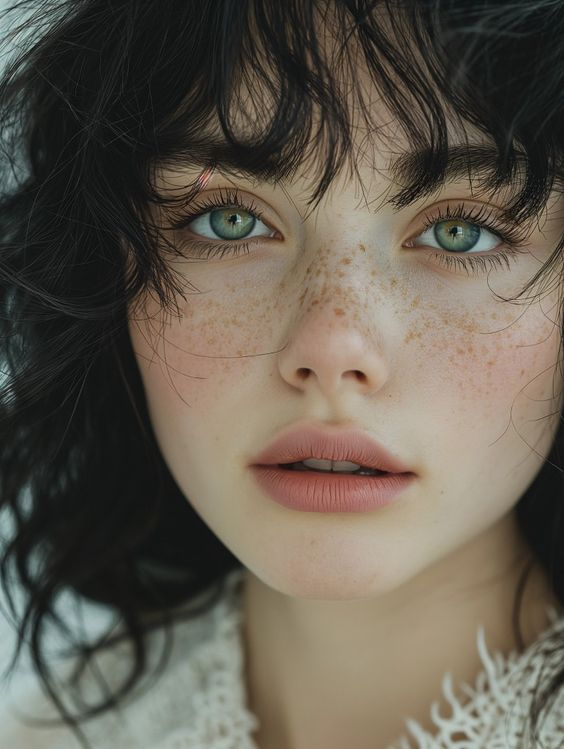


Grayscale Image:


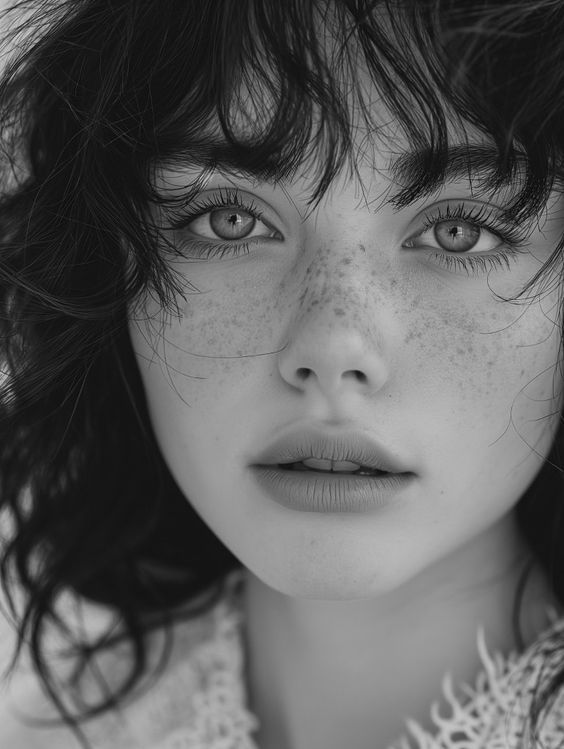


Images loaded and displayed successfully.


In [7]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab display

# Placeholder for image path. Please replace 'path/to/your/image.jpg' with the actual path to your image.
# For example, if you're using a sample image from scikit-image, you might load it like this:
# from skimage import data
# image = data.coffee()
# However, the instruction specifically asks to load from a file using cv2.imread().
# Let's assume there is an image file named 'texture_image.jpg' in the current directory for demonstration.
# If you don't have one, you can download a sample image or create a dummy one.
image_path = '/content/woman.jpg' # <<< REPLACE WITH YOUR IMAGE PATH

try:
    # 2. Load an image from a specified file path using cv2.imread()
    original_image = cv2.imread(image_path)

    if original_image is None:
        raise FileNotFoundError(f"Error: Image not found at {image_path}. Please ensure the path is correct.")

    # 3. Convert the loaded image to grayscale using cv2.cvtColor()
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # 4. Display the original and grayscale images using cv2_imshow
    print("Original Image:")
    cv2_imshow(original_image)
    print("\nGrayscale Image:")
    cv2_imshow(gray_image)

    print("\nImages loaded and displayed successfully.")

except FileNotFoundError as e:
    print(e)
    print("Please provide a valid path to an image file.")
except Exception as e:
    print(f"An error occurred: {e}")

In [8]:
import numpy as np

# 1. Define the parameters for the Gabor filter bank
ksize = (31, 31) # Kernel size (width, height)
sigma = 5.0      # Standard deviation of Gaussian envelope
gamma = 0.5      # Spatial aspect ratio
psi = 0          # Phase offset (0 for even symmetric, pi/2 for odd symmetric)

# Experiment with a range of theta values (orientations)
thetas = np.arange(0, np.pi, np.pi / 8) # 8 orientations from 0 to 180 degrees

# Experiment with a range of lambda values (frequencies)
lambdas = np.arange(5, 20, 5) # 3 frequencies: 5, 10, 15

# 2. Initialize an empty list to store the generated Gabor kernels
gabor_kernels = []

print("Generating Gabor filter bank...")

# 3. Loop through the defined theta and lambda values and generate Gabor kernels
for theta in thetas:
    for lmbd in lambdas:
        # Generate a Gabor kernel using cv2.getGaborKernel()
        # ktype=cv2.CV_32F ensures floating-point output
        kernel = cv2.getGaborKernel(ksize, sigma, theta, lmbd, gamma, psi, ktype=cv2.CV_32F)
        # 4. Append each generated kernel to the list
        gabor_kernels.append(kernel)

print(f"Successfully generated {len(gabor_kernels)} Gabor kernels.")
print(f"Example kernel shape: {gabor_kernels[0].shape}")


Generating Gabor filter bank...
Successfully generated 24 Gabor kernels.
Example kernel shape: (31, 31)


In [9]:
import cv2
import numpy as np

# 1. Initialize an empty list to store the filtered images
filtered_images = []

print(f"Applying {len(gabor_kernels)} Gabor filters to the grayscale image...")

# 2. Iterate through each Gabor kernel stored in the gabor_kernels list
for i, kernel in enumerate(gabor_kernels):
    # 3. For each kernel, apply it to the gray_image using cv2.filter2D()
    # ddepth=-1 means the output image will have the same depth as the source (gray_image).
    # Alternatively, use cv2.CV_32F for floating-point output.
    filtered_response = cv2.filter2D(gray_image, cv2.CV_32F, kernel)

    # Take the absolute value of the filtered response to represent feature strength
    abs_filtered_response = np.abs(filtered_response)

    # Normalize the absolute filtered response for better visualization if needed (optional)
    # abs_filtered_response = cv2.normalize(abs_filtered_response, None, 0, 255, cv2.NORM_MINMAX)
    # abs_filtered_response = abs_filtered_response.astype(np.uint8)

    # 4. Append the resulting filtered image to the list
    filtered_images.append(abs_filtered_response)

print(f"Successfully generated {len(filtered_images)} filtered images.")
print(f"Example filtered image shape: {filtered_images[0].shape}")

Applying 24 Gabor filters to the grayscale image...
Successfully generated 24 filtered images.
Example filtered image shape: (749, 564)


In [10]:
import numpy as np

# 1. Get the dimensions (height and width) of the gray_image
h, w = gray_image.shape

# The number of filters is the length of the filtered_images list
num_filters = len(filtered_images)

# 2. Initialize an empty array for the feature map
# Each pixel will be a row, and each filter response will be a column.
# So, the shape will be (h * w, num_filters)
feature_map = np.zeros((h * w, num_filters), dtype=np.float32)

print(f"Initializing feature map with shape: {feature_map.shape}")

# 3. Iterate through the filtered_images list
for i, filtered_img in enumerate(filtered_images):
    # 4. For each filtered image, reshape it into a 1D array (h*w,)
    # and add it as a column to the feature map.
    feature_map[:, i] = filtered_img.flatten()

print(f"Successfully created feature map with shape: {feature_map.shape}")
print("Each row in the feature map represents a pixel, and each column represents the response of a Gabor filter.")

Initializing feature map with shape: (422436, 24)
Successfully created feature map with shape: (422436, 24)
Each row in the feature map represents a pixel, and each column represents the response of a Gabor filter.


In [11]:
from sklearn.cluster import KMeans

# 1. Define the number of clusters
n_clusters = 4 # Experiment with this value (e.g., 3, 4, 5)

print(f"Applying K-Means clustering with {n_clusters} clusters...")

# 2. Instantiate a KMeans object
# n_init='auto' is recommended for scikit-learn versions >= 1.2
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

# 3. Fit the K-Means model to the feature_map and predict the labels
segmented_labels = kmeans.fit_predict(feature_map)

# 4. Reshape the segmented_labels back into the original image dimensions (h, w)
segmented_image = segmented_labels.reshape(h, w)

print("K-Means clustering completed.")
print(f"Shape of segmented_image: {segmented_image.shape}")
print(f"Unique cluster labels: {np.unique(segmented_image)}")

Applying K-Means clustering with 4 clusters...
K-Means clustering completed.
Shape of segmented_image: (749, 564)
Unique cluster labels: [0 1 2 3]


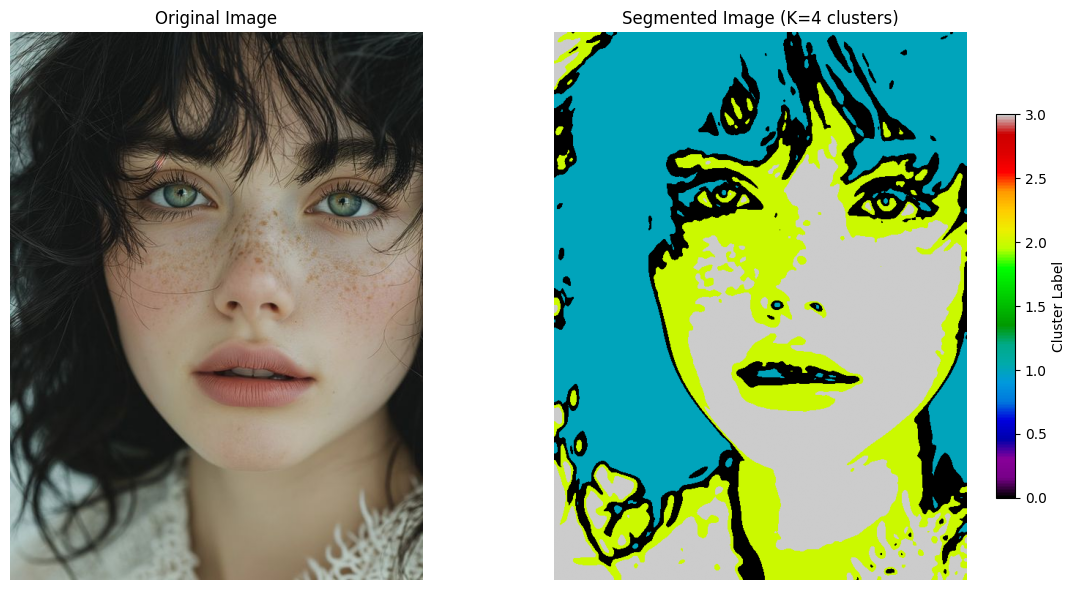

Original and segmented images displayed successfully.


In [12]:
import matplotlib.pyplot as plt
import cv2

# 1. Create a figure with two subplots
plt.figure(figsize=(12, 6))

# 2. Display the original image in the first subplot
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
# Convert original_image from BGR to RGB for correct display with matplotlib
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

# 3. Display the segmented image in the second subplot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.imshow(segmented_image, cmap='nipy_spectral') # Using 'nipy_spectral' colormap
plt.title(f'Segmented Image (K={n_clusters} clusters)')
plt.axis('off')

# 4. Add a colorbar to the segmented image subplot as a legend
cbar = plt.colorbar(shrink=0.7)
cbar.set_label('Cluster Label')

# 5. Adjust layout and display the plot
plt.tight_layout()
plt.show()

print("Original and segmented images displayed successfully.")